In [2]:
# prompt: import all the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression


In [3]:
# prompt: import and print 5 columns of dataset

df = pd.read_csv('heart_disease_data.csv')  # Replace 'dataset.csv' with the actual file name
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
# prompt: convert that to a Dataframe

data = pd.DataFrame(df)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# prompt: now describe the data

print(data.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [7]:
# prompt: print the shape

print(data.shape)


(303, 14)


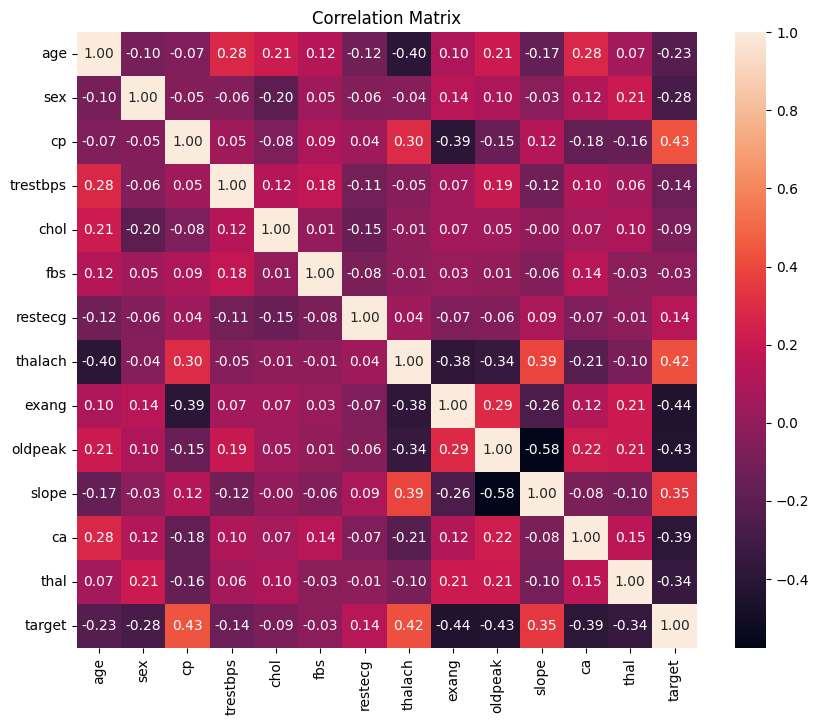

In [8]:
# prompt: show the correlation between features using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [9]:
# prompt: print the info of the dataset

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [10]:
# prompt: print the null values in the data

print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


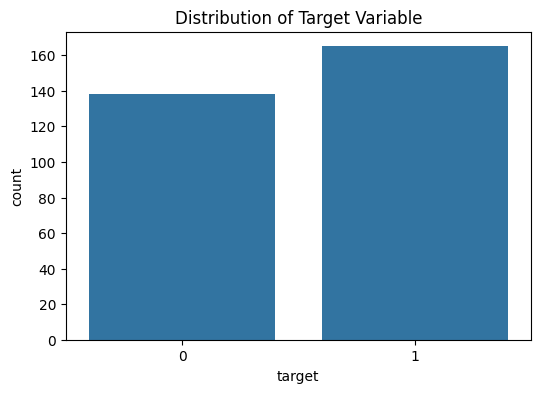

In [11]:
# prompt: checking the distribution of target variable

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


1 - Healthy Heart
0 - Defective Heart

In [12]:
# prompt: seperate the target and all the features

# Separate the target variable from the features
X = data.drop('target', axis=1)
y = data['target']


In [13]:
# prompt: print the shape of x and y

print(X.shape)
print(y.shape)


(303, 13)
(303,)


In [16]:
# prompt: split the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(242, 13)
(61, 13)
(242,)
(61,)


In [17]:
# prompt: model training using Logistic Regression

# Initialize the LogisticRegression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# prompt: model evaluation using accuracy score

from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.819672131147541


In [19]:
# prompt: do the accuracy score on training data

# Calculate the accuracy score on training data
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Print the accuracy score on training data
print('Training Accuracy:', accuracy_train)


Training Accuracy: 0.8512396694214877


In [21]:
input_data = (45,1,3,110,264,0,1,132,0,1.2,1,0,3)
inp_data = np.asarray(input_data)
inp_data_reshaped = inp_data.reshape(1,-1)
prediction = model.predict(inp_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
